# Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Explore the datasets

The datasets has been collected for SMS Spam research and it has two columns. One columns has the text and another shows the label(ham or spam)

In [2]:
spam_df = pd.read_csv("emails.csv")

In [3]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
spam_df["spam"].value_counts(normalize=True)

0    0.761173
1    0.238827
Name: spam, dtype: float64

# Visualize the datasets

In [8]:
spam_df["length"] = spam_df["text"].apply(len)
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


<AxesSubplot:ylabel='Frequency'>

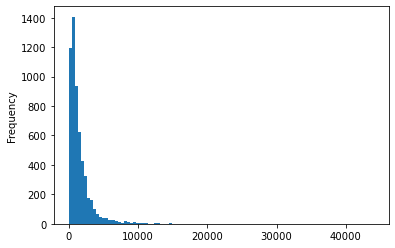

In [9]:
spam_df["length"].plot(bins=100, kind="hist")

In [10]:
spam_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

# Clean the datasets

In [11]:
#remove punctutation
import string

In [12]:
#remove stopwords
from nltk.corpus import stopwords

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(spam_df["text"], spam_df["spam"], test_size=0.2)

In [15]:
def clean_message(message):
    message = [char for char in message if char not in string.punctuation]
    message = "".join(message)
    message = [word for word in message.split() if word.lower() not in stopwords.words("english")]
    message = " ".join(message) 
    return message


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()#min_df=0.01, max_features=300, stop_words="english")

In [17]:
CV.fit(X_train.apply(clean_message))

CountVectorizer()

In [18]:
X_train = CV.transform(X_train)
X_test = CV.transform(X_test)

# Training the models

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Evaluate the model

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

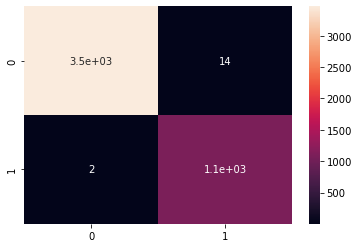

In [22]:
#predict the training set
y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

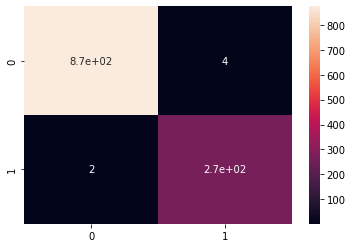

In [23]:
#predict the test set
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [24]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       878
           1       0.99      0.99      0.99       268

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

